In [61]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

# Q.3

## (a) Bisection Method

In [62]:
def f(tau,y,u):
    visc=1.5e-5 #unit: m2/s 
    kappa=0.41
    B=5.1

    U_plus=u/tau
    Y_plus=tau*y/visc

    ans=-Y_plus+U_plus+np.exp(-kappa*B)*(np.exp(kappa*U_plus)-1-kappa*U_plus-1/2*(kappa*U_plus)**2-1/6*(kappa*U_plus)**3-1/24*((kappa*U_plus)**4))
    return ans

In [63]:
a=0.1
b=2
root_bis=np.zeros(1)
root_bis[0]=(a+b)/2
y=0.01
u=21
rou=1.25
tolerance=1e-3
f(b,y,u)

-1318.893031144245

In [64]:
toler=1
i=0
while toler>=tolerance:
    i+=1
    if f(a,y,u)*f((a+b)/2,y,u)<0:
        b=(a+b)/2
    else:
        a=(a+b)/2
    toler=np.abs(b-a)
    rooti=(a+b)/2
    root_bis=np.append(root_bis,rooti)
print('Root of u_tau=',rooti)
tau_bis=root_bis[i]**2*rou
print("Wall Shear Stress(bisection method)=",tau_bis)

Root of u_tau= 0.9975830078125001
Wall Shear Stress(bisection method)= 1.2439648218452932


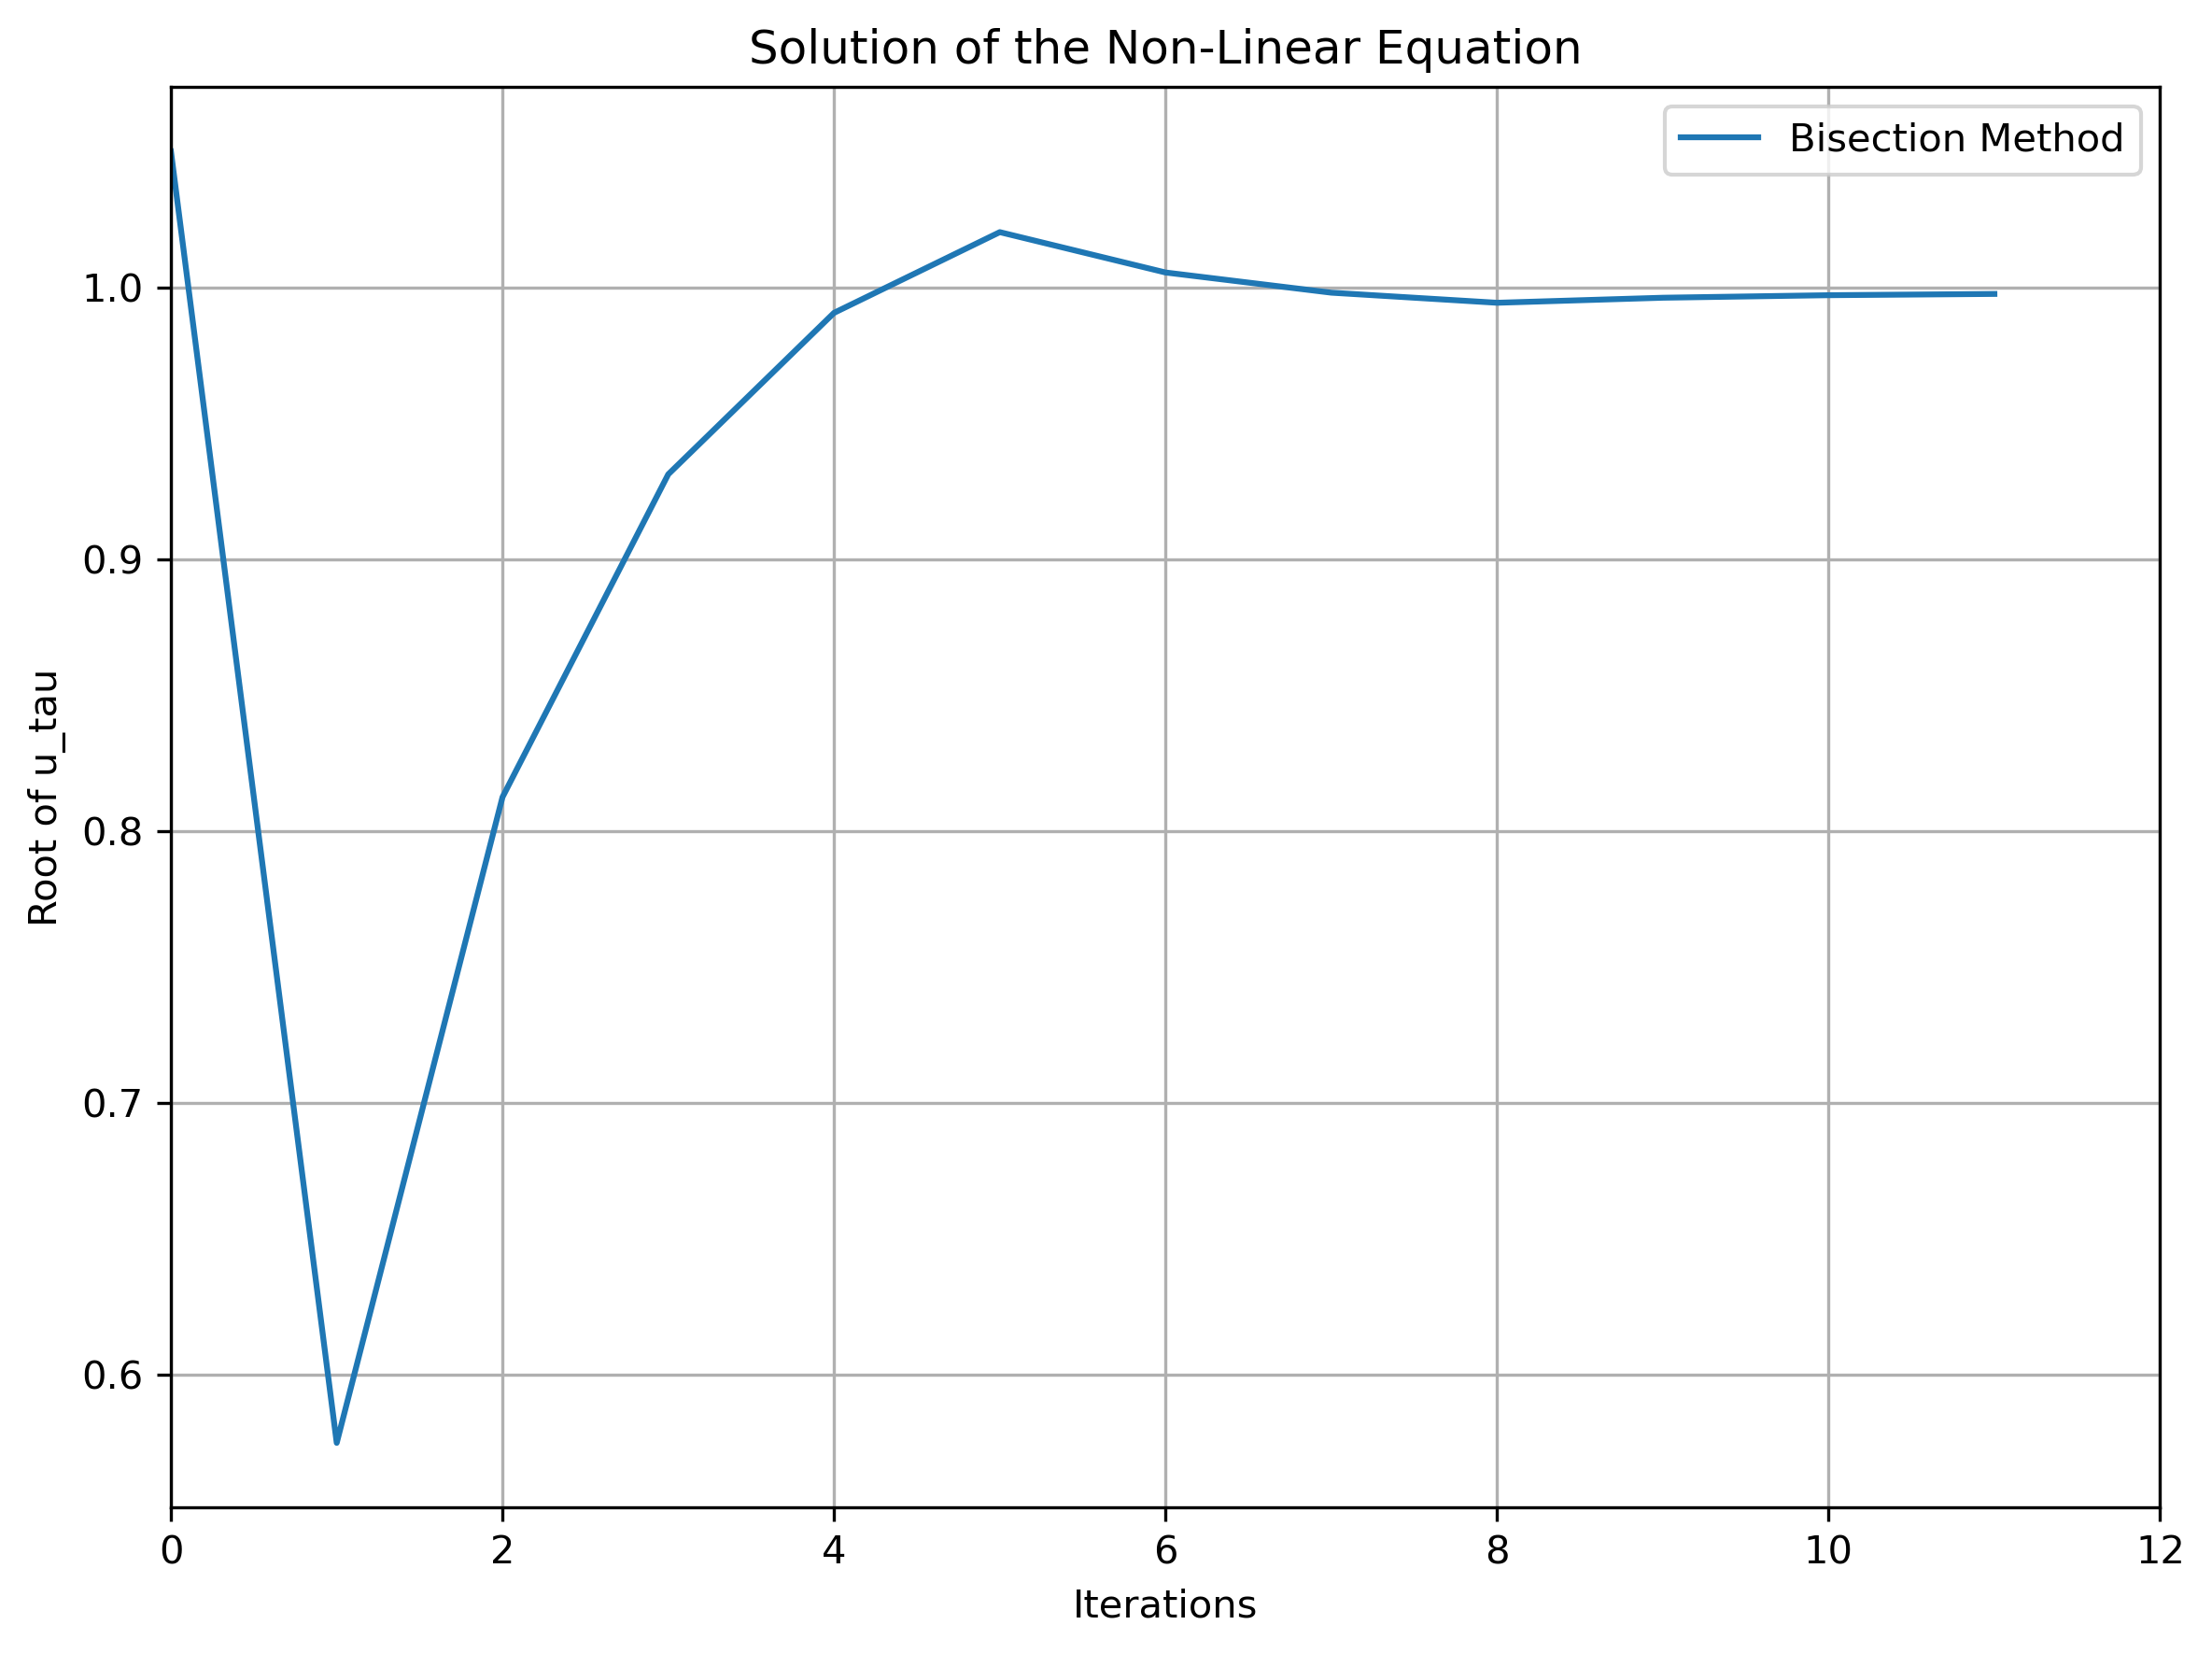

In [65]:
plt.figure(figsize=(8, 6), dpi=300)
plt.xlim([0,12])
plt.plot(list(range(len(root_bis))), root_bis, label=f"Bisection Method")
plt.title("Solution of the Non-Linear Equation")
plt.xlabel("Iterations")
plt.ylabel("Root of u_tau")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## (b) Newton’s Method

In [66]:
def fd(tau,y,u): #calculate the deratives of f(tau,y,u) using differential
    dx=0.0001
    return (f(tau+dx,y,u)-f(tau,y,u))/dx


In [67]:
toler=1
root_n=np.zeros(1)
root_n[0]=0.1
i=0
while toler>=tolerance:
    root_np1=root_n[i]-f(root_n[i],y,u)/fd(root_n[i],y,u)
    root_n=np.append(root_n,root_np1)
    toler=np.abs(f(root_n[i+1],y,u))
    #print(toler)
    i+=1
tau_new=root_n[i]**2*rou
print('Root of u_tau=',root_np1)
print("Wall Shear Stress(Newton's method)=",tau_new)

Root of u_tau= 0.9976727452597954
Wall Shear Stress(Newton's method)= 1.2441886332927707


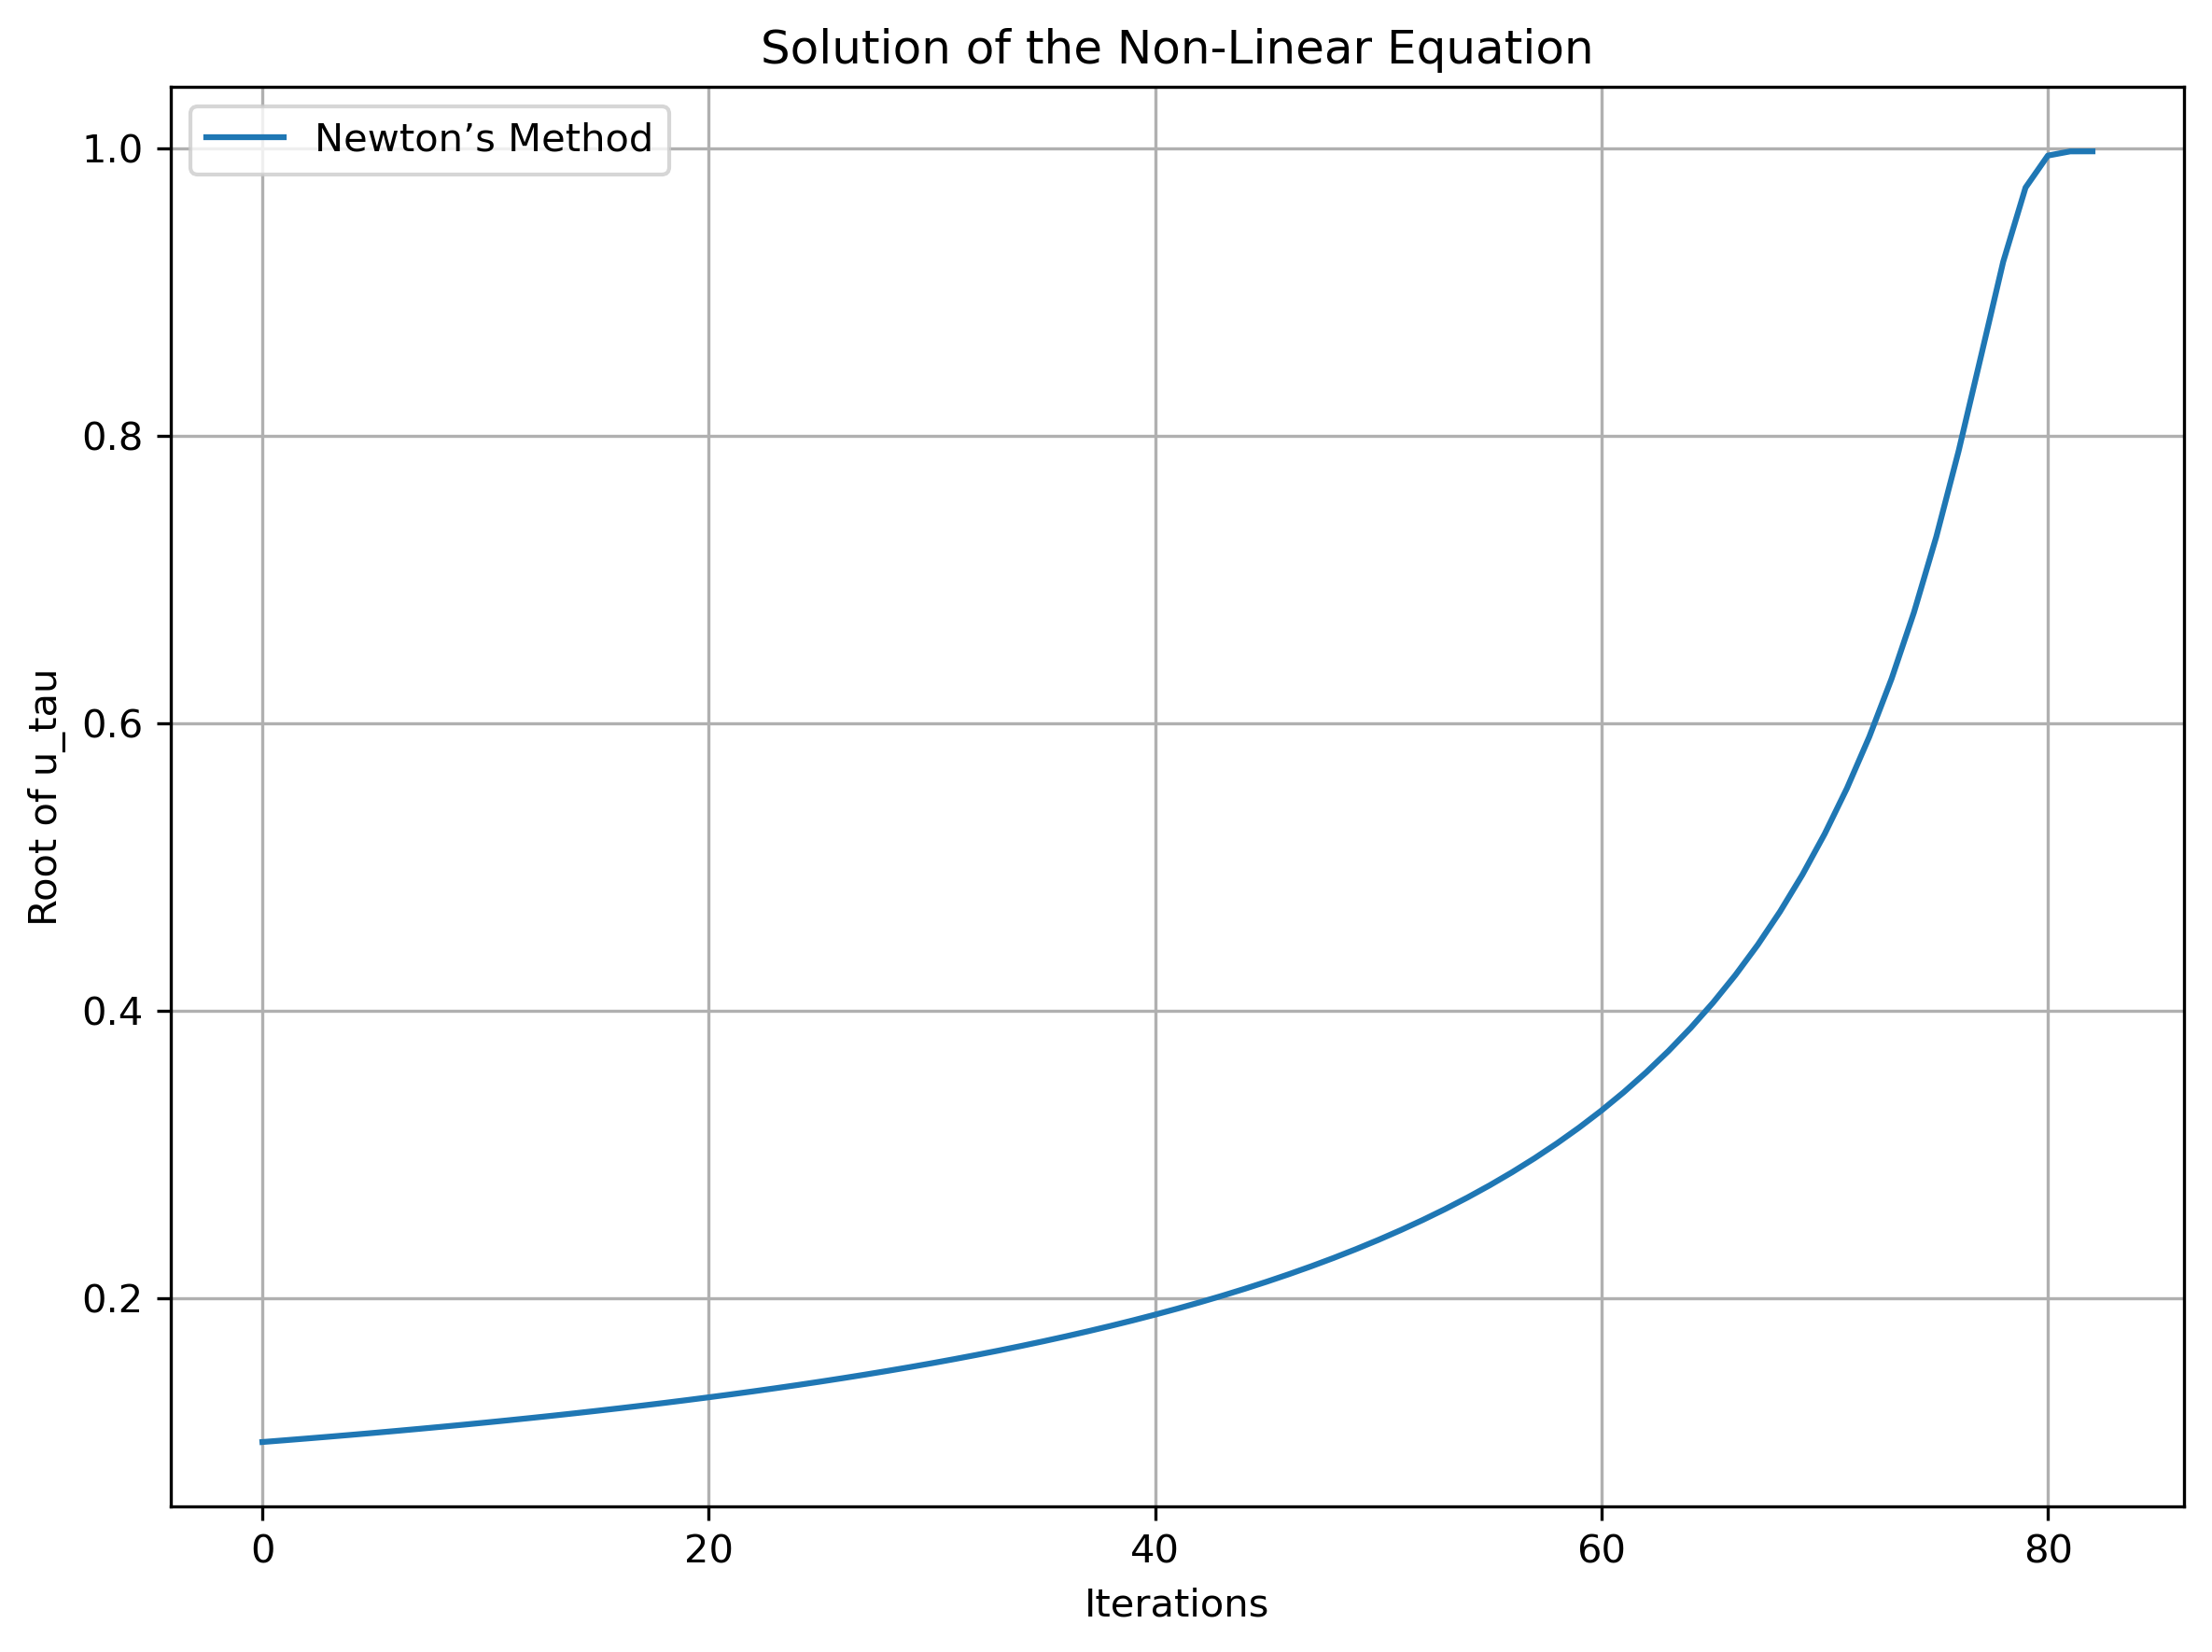

In [68]:
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(list(range(len(root_n))), root_n, label=f"Newton’s Method")
plt.title("Solution of the Non-Linear Equation")
plt.xlabel("Iterations")
plt.ylabel("Root of u_tau")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## (c) Try to find a fixed point iteration formula that converges.

In [69]:
def f(U_plus):
    kappa=0.41
    B=5.1
    Y_plus=21/U_plus*0.01/1.5e-5
    ans=-Y_plus+U_plus+np.exp(-kappa*B)*(np.exp(kappa*U_plus)-1-kappa*U_plus-1/2*(kappa*U_plus)**2-1/6*(kappa*U_plus)**3-1/24*((kappa*U_plus)**4))
    return ans

toler=0.1
i=1
U_plus=np.zeros(1)
U_plus[0]=20#初始值
i=0
tolerance=1e-20
while toler>=tolerance:
    ans=f(U_plus[i])
    ans_1=U_plus[i]-ans/(U_plus[i]**4)
    toler=np.abs(ans_1-U_plus[i])
    #print('toler=',toler,'ans=',ans_1)
    U_plus=np.append(U_plus,ans_1)
    i+=1
    if i>1e10:
        break#控制迭代次数
tau=21/U_plus[i]
tau_wall=tau**2*rou
print("Wall Shear Stress(Fixed Point Iteration)=",tau_wall,"Iterations=",i)
print("Tolerance=",toler)

Wall Shear Stress(Fixed Point Iteration)= 1.2441886041081007 Iterations= 17445
Tolerance= 0.0


In [70]:
f(U_plus[i])

-3.482227839413099e-10